<a href="https://colab.research.google.com/github/Manojpatil123/Machine-learning-Assignments/blob/main/Assignment_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision trees are generally used for classification problems. But it can also be used for regression problems by grouping the dependent variable (continuous) into buckets. <code>DecisionTreeRegressor()</code> from the scikit-learn library helps us to use decision trees for regression problems. The implementation is similar to <code>DecisionTreeClassifier()</code>.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/data/housing.csv'
df=pd.read_csv(path,delimiter = '\s+',header = None,names=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv',])

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
features=df.columns

In [ ]:
independent_features=features.drop('medv')

In [ ]:
independent_features

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

no null values in the data set

In [ ]:
# duplicate
len(df[df.duplicated()])

0

no duplicate rows 

In [ ]:
df.medv.value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: medv, Length: 229, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'medv')

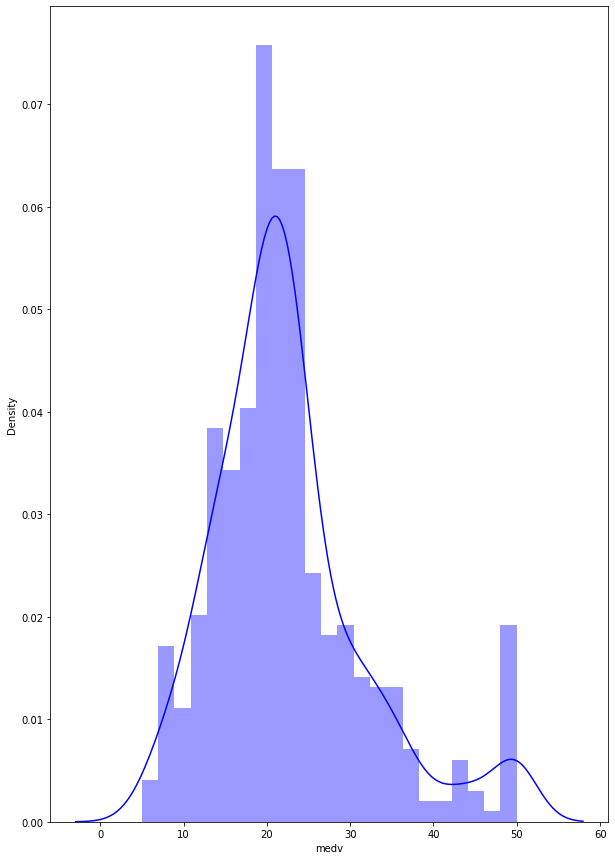

In [ ]:
plt.figure(figsize=(10,15))
sns.distplot((df['medv']),color='b')
plt.xlabel('medv')

we have 2 mode becouse of more values 50 present but we consider only one mode in this model

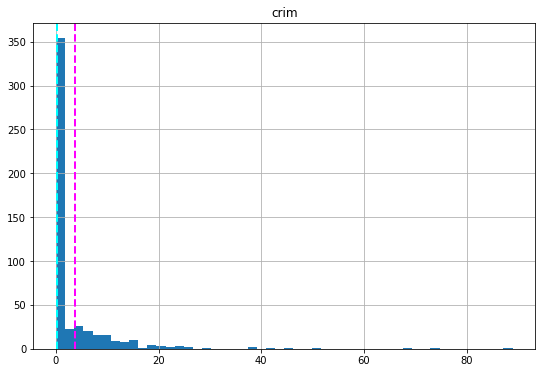

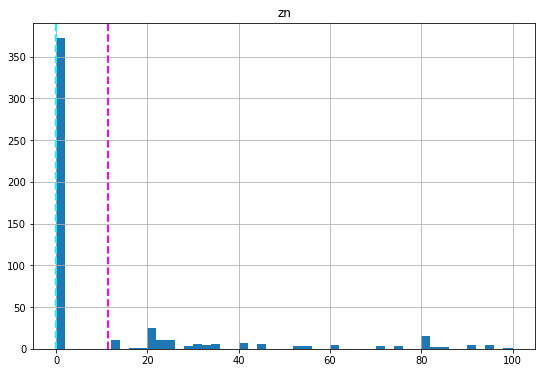

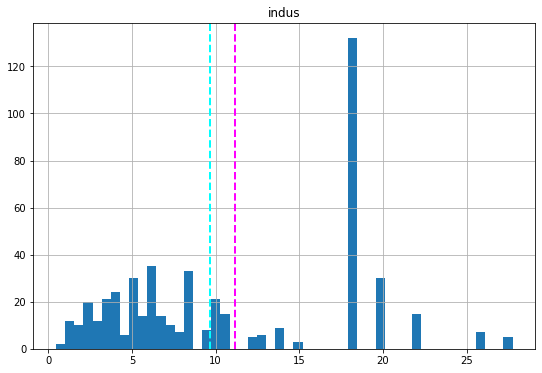

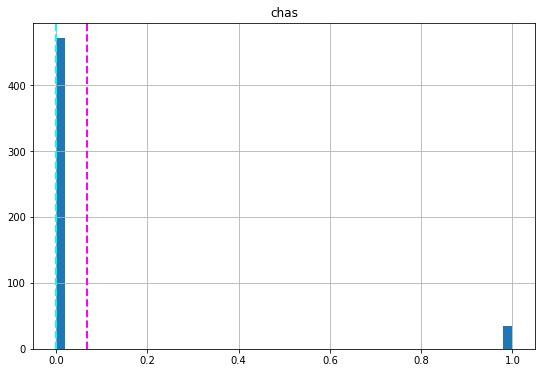

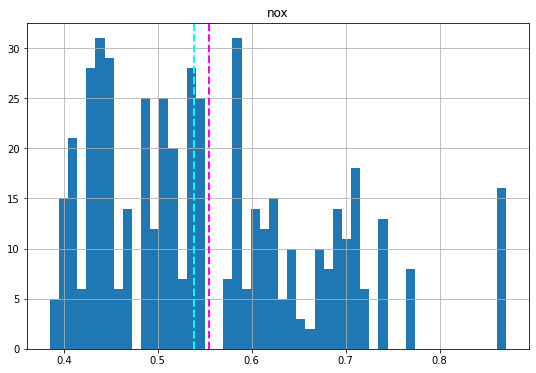

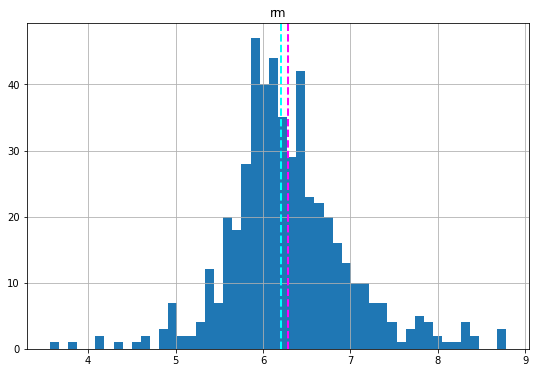

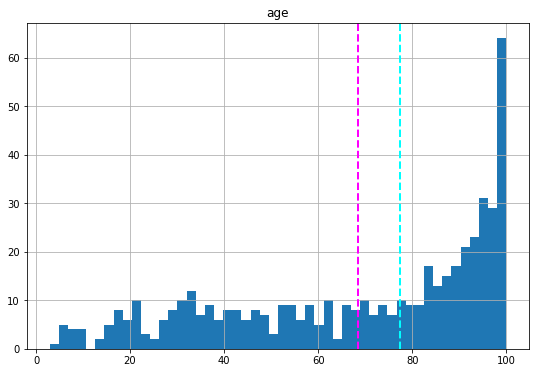

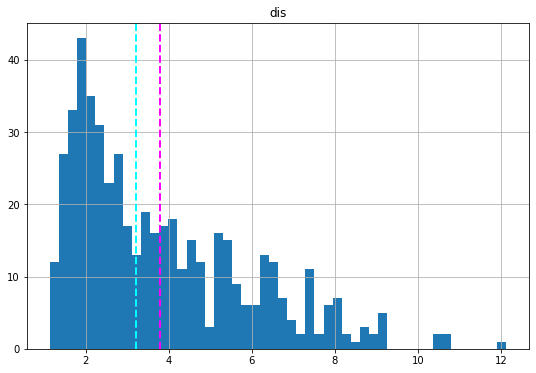

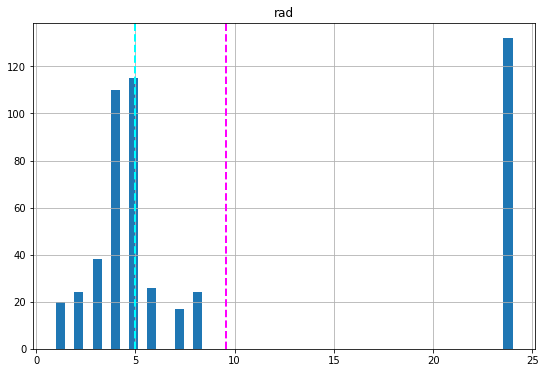

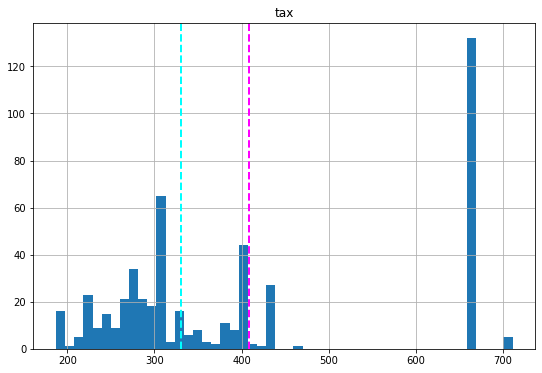

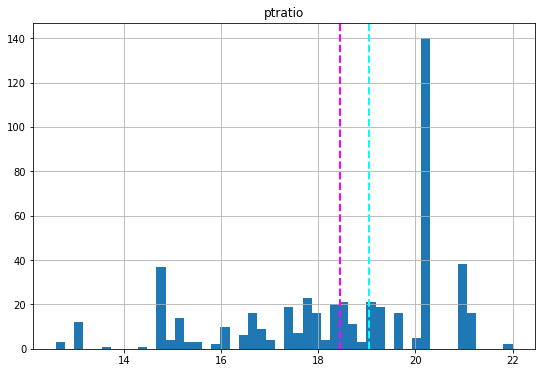

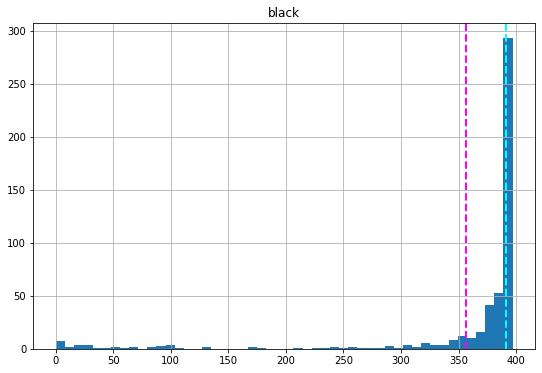

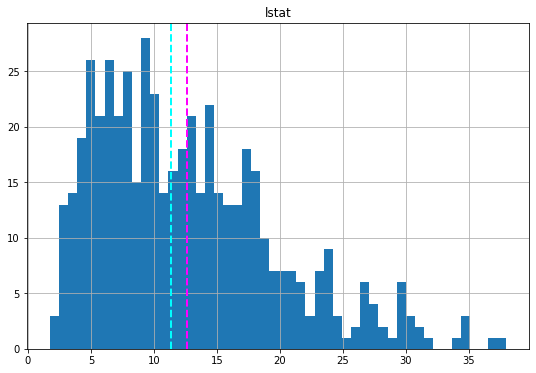

In [ ]:
for col in independent_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

transformation

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


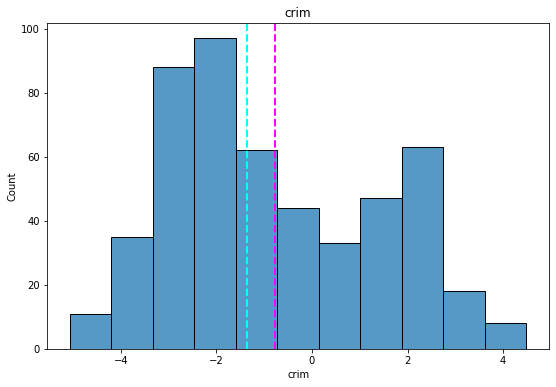

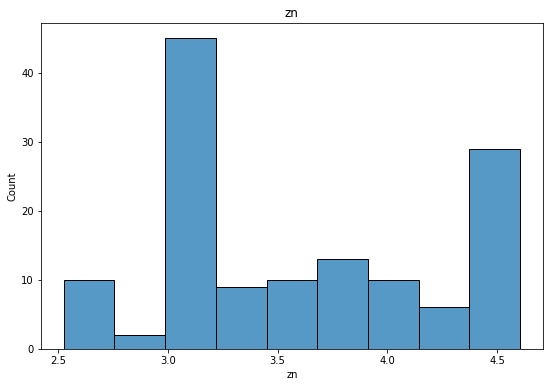

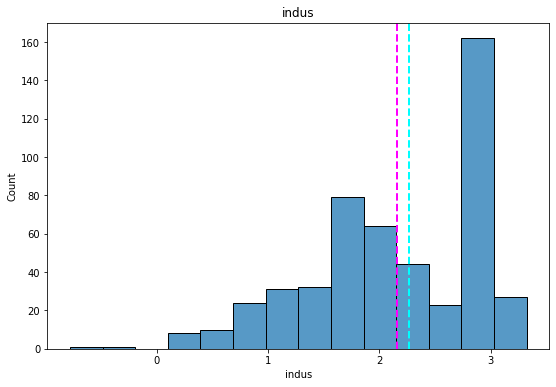

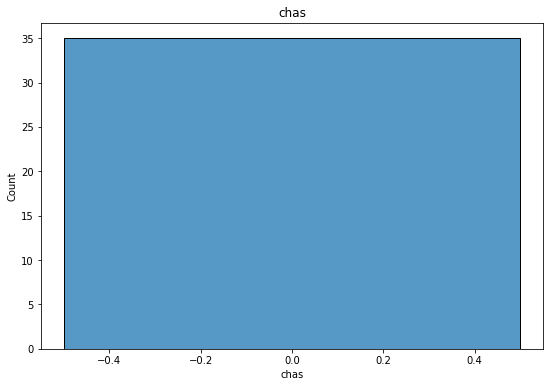

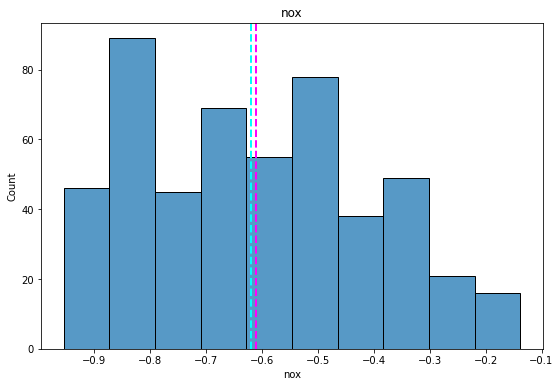

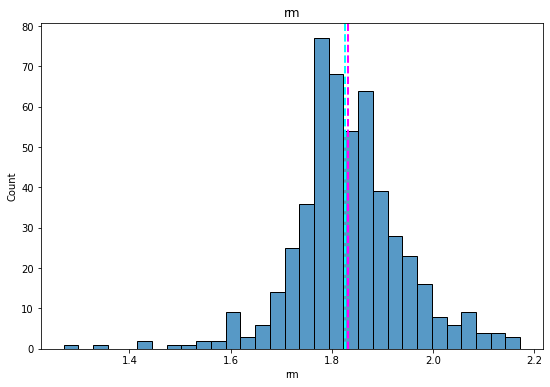

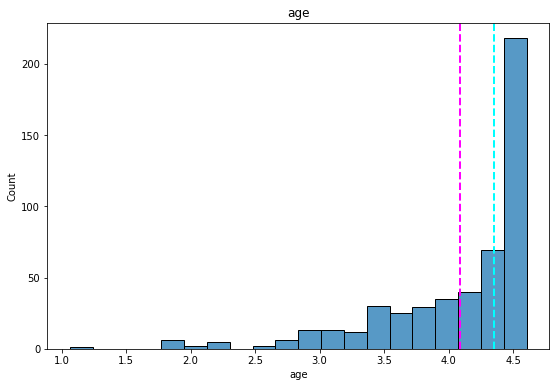

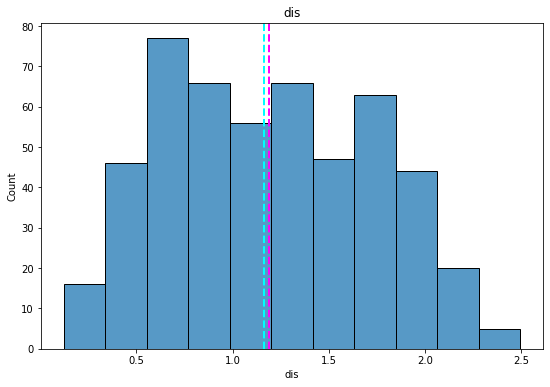

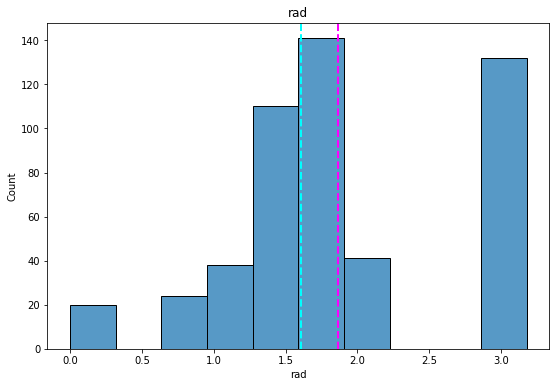

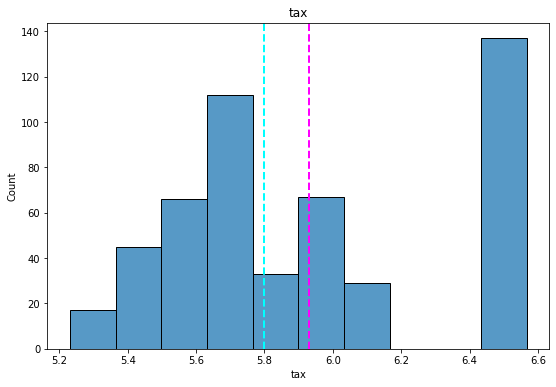

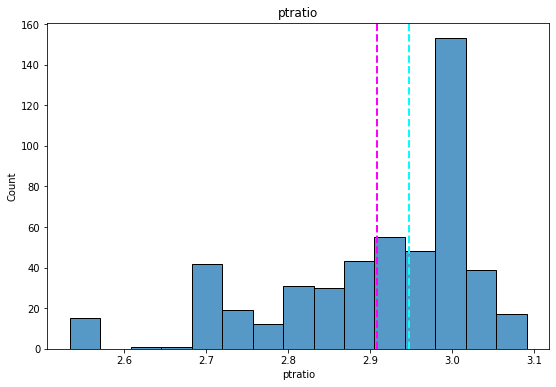

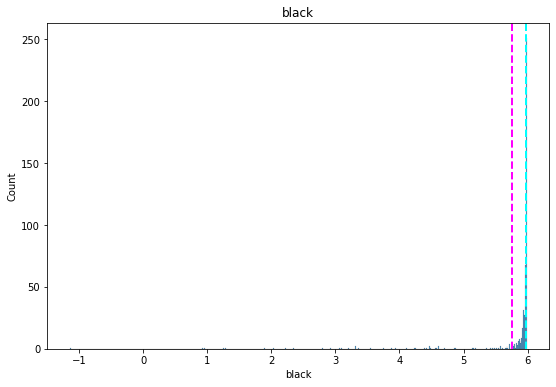

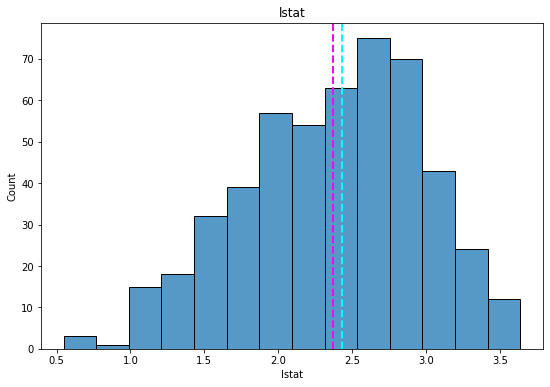

In [ ]:
for col in independent_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(df[col])
    sns.histplot(feature, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

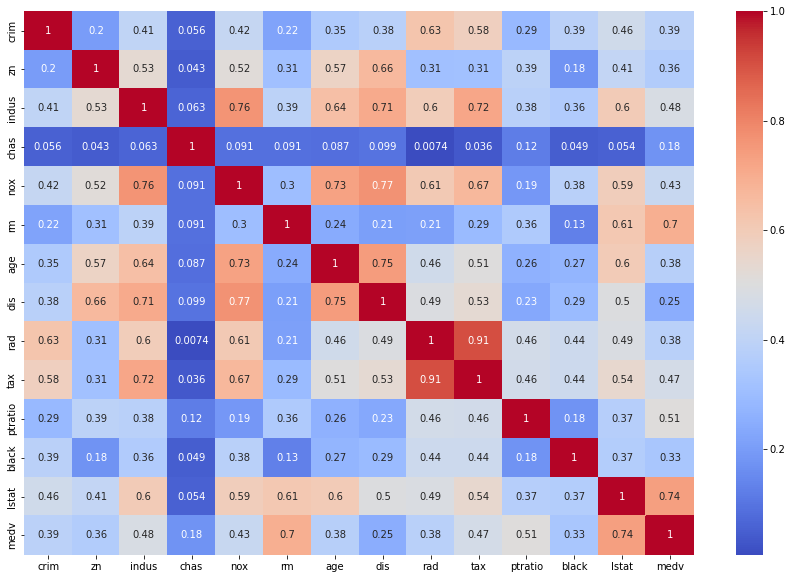

In [ ]:
# Correlation
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


checking outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

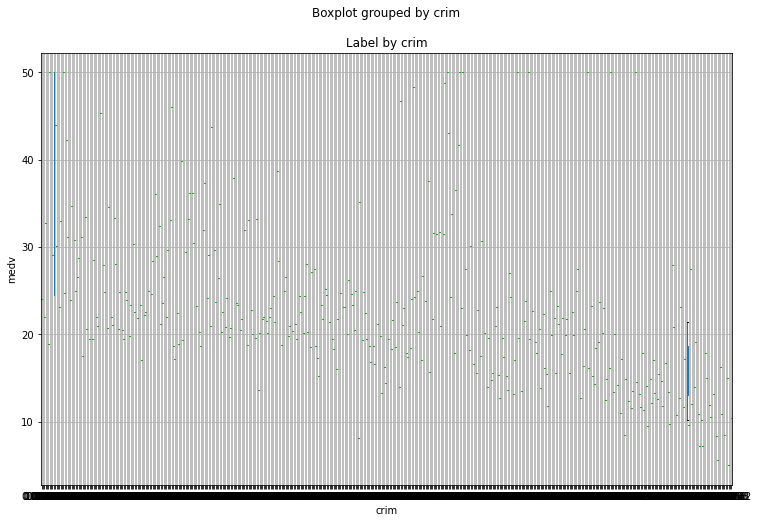

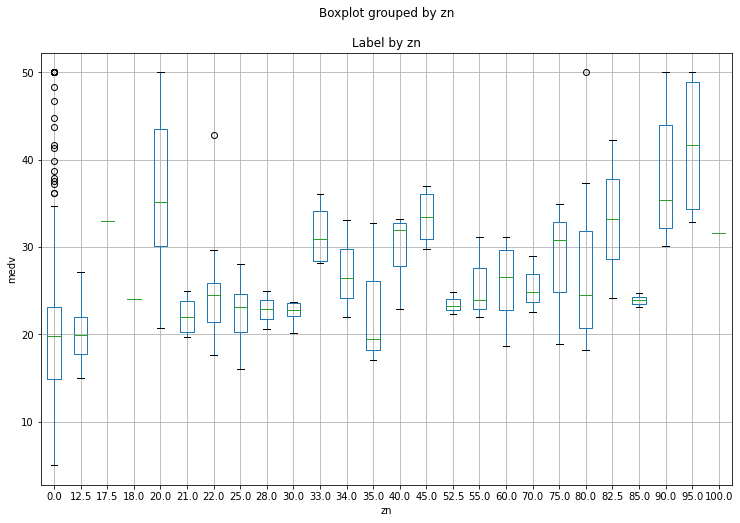

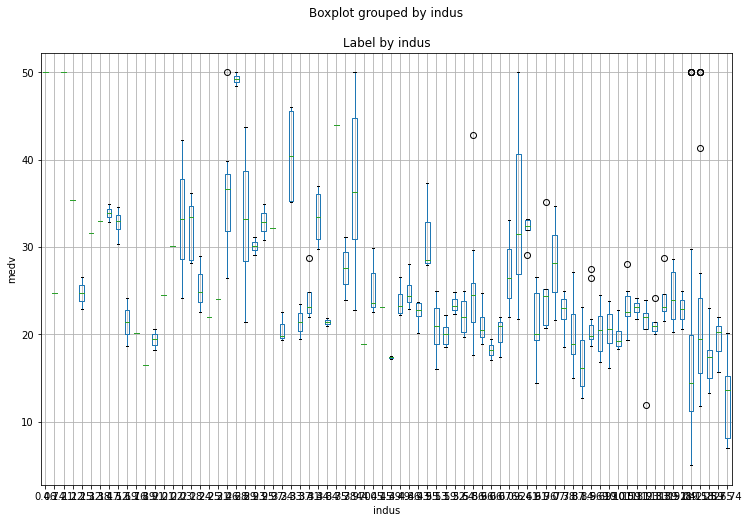

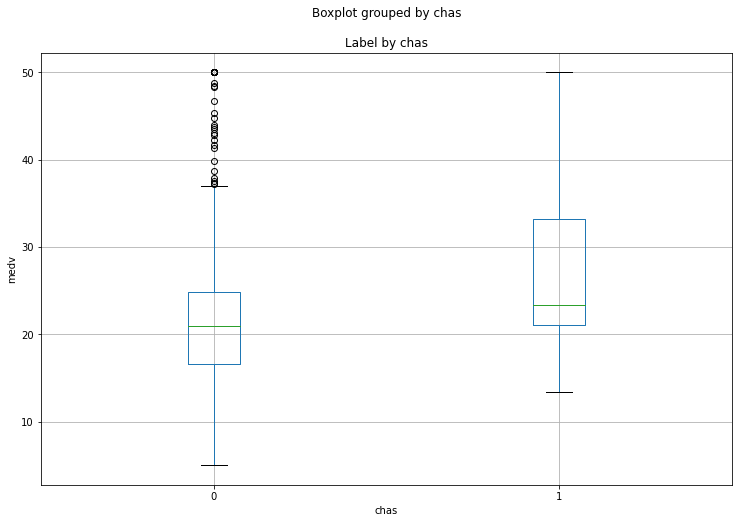

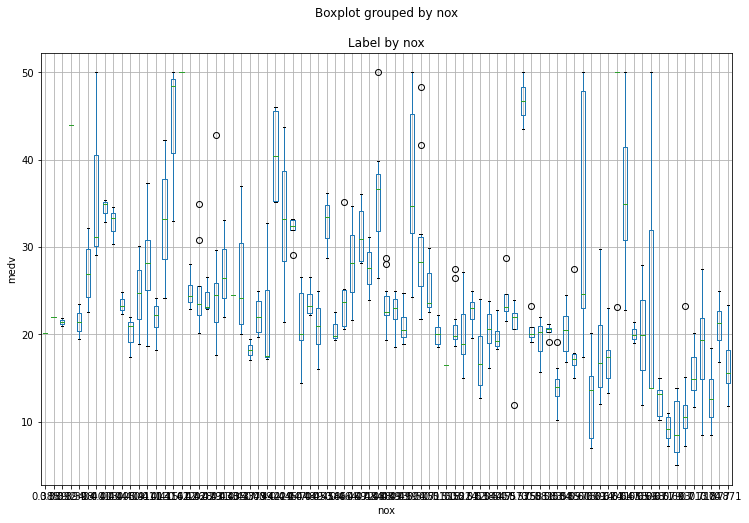

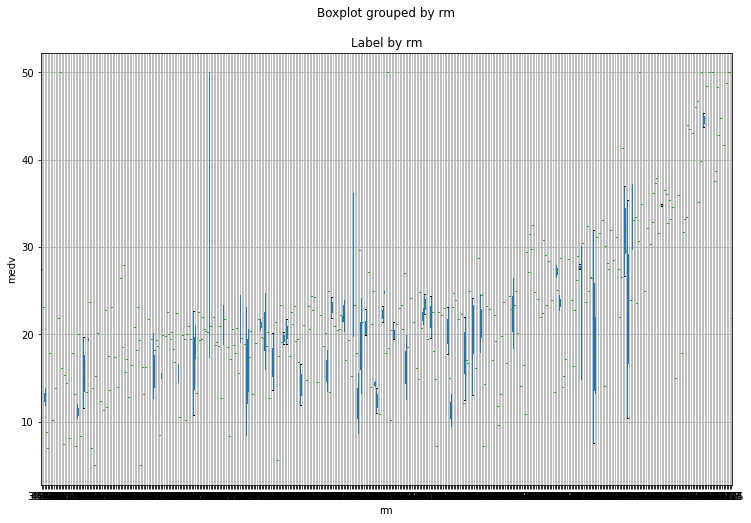

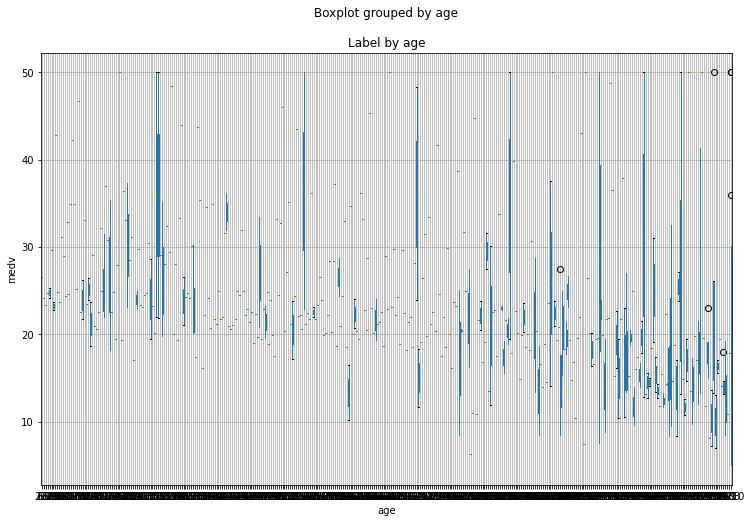

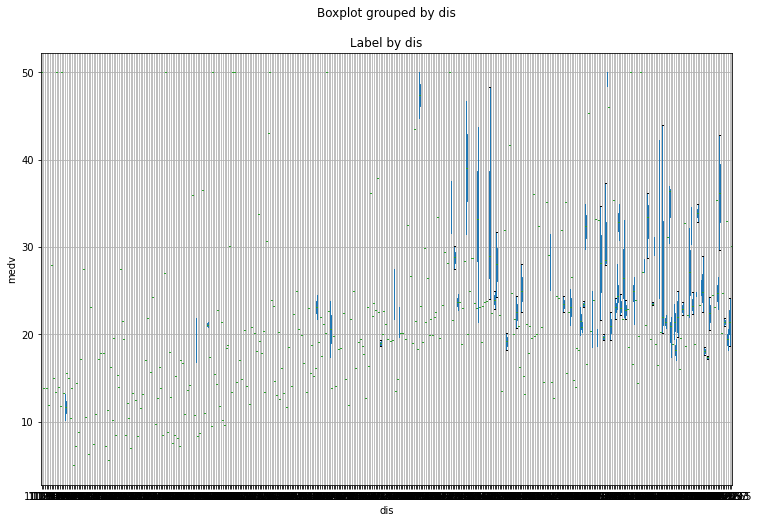

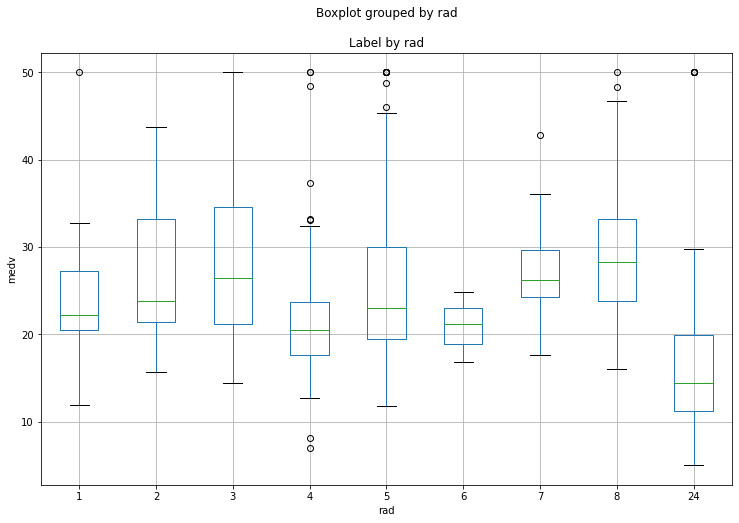

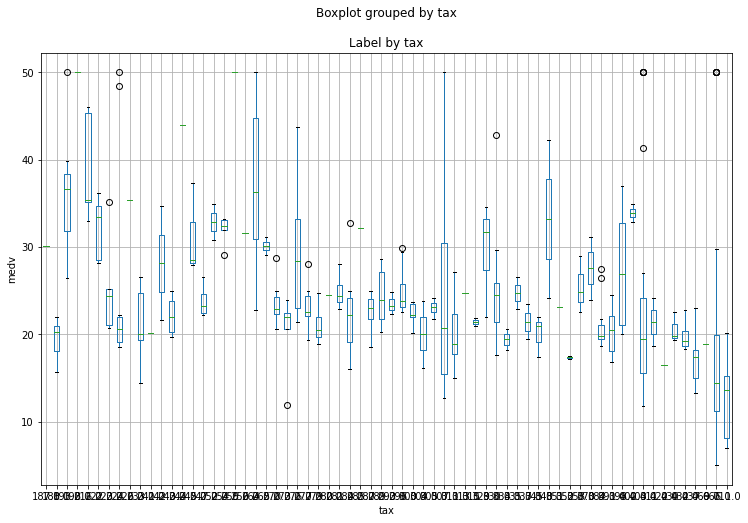

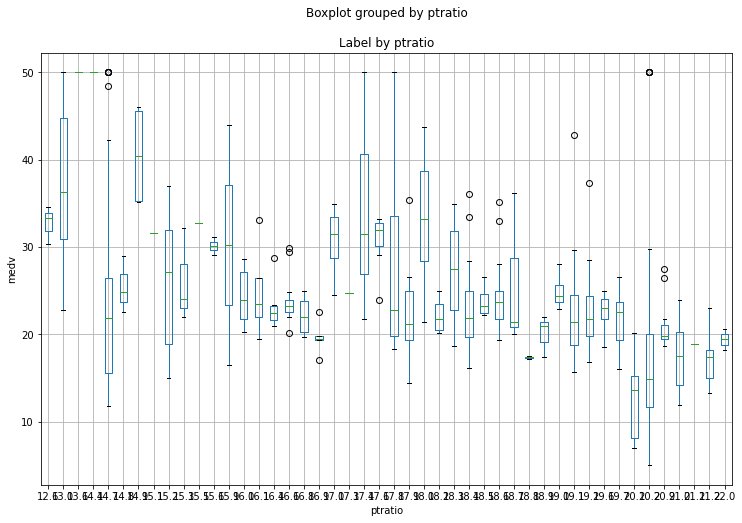

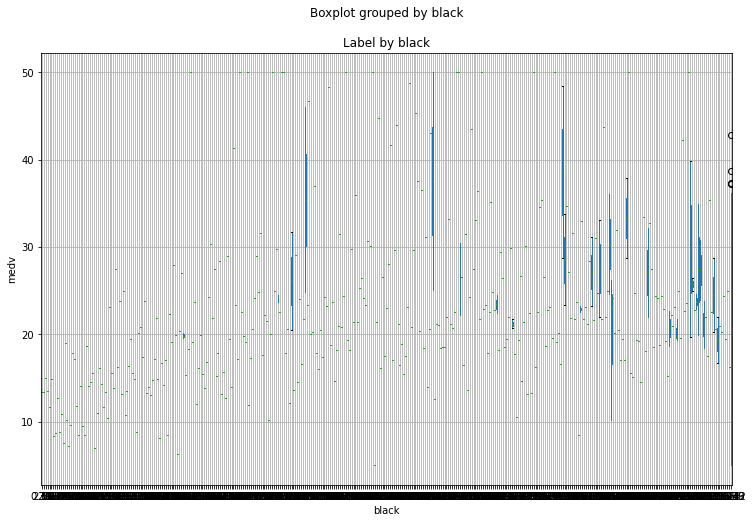

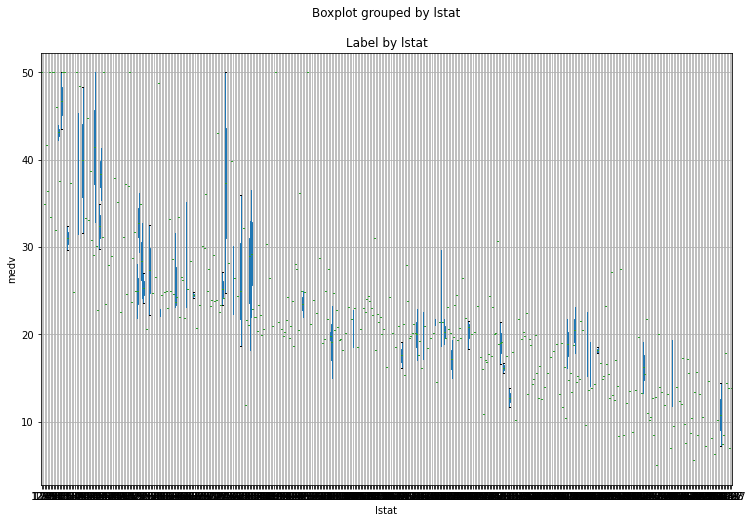

In [ ]:
for col in independent_features:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    df.boxplot(column = 'medv', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("medv")
plt.show()

luckily decision tree not sensitive for outliers so need to remove outliers in decision tree, random forest algorithum

x and y split

In [ ]:
X = df[independent_features]

In [ ]:
y=df['medv']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324) 
print(X_train.shape)
print(X_test.shape)

(339, 13)
(167, 13)


In [ ]:
tree = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=1, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
tree.score(X_train, y_train)

1.0

prediction

In [ ]:
y_predicted = tree.predict(X_test)

In [63]:
y_train_pred=tree.predict(X_train)

In [ ]:
y_predicted[:10]

array([44.8, 22. ,  9.5,  7. , 17.5, 44.8, 19.6, 33. , 16.7, 44.8])

In [ ]:
y_test[:10]

233    48.3
53     23.4
423    13.4
399     6.3
346    17.2
226    37.6
69     20.9
264    36.5
488    15.2
232    41.7
Name: medv, dtype: float64

evaluating model

In [64]:
MSE  = mean_squared_error((y_train), (y_train_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_train), (y_train_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_train), (y_train_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 0.0
MAE : 0.0
RMSE : 0.0
R2 : 1.0
Adjusted R2 :  1.0


In [62]:
MSE  = mean_squared_error((y_test), (y_predicted))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_predicted))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test), (y_predicted))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predicted)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 26.665748502994013
MAE : 3.2107784431137723
RMSE : 5.163888893362638
R2 : 0.6866627363052686
Adjusted R2 :  0.6600393086710759


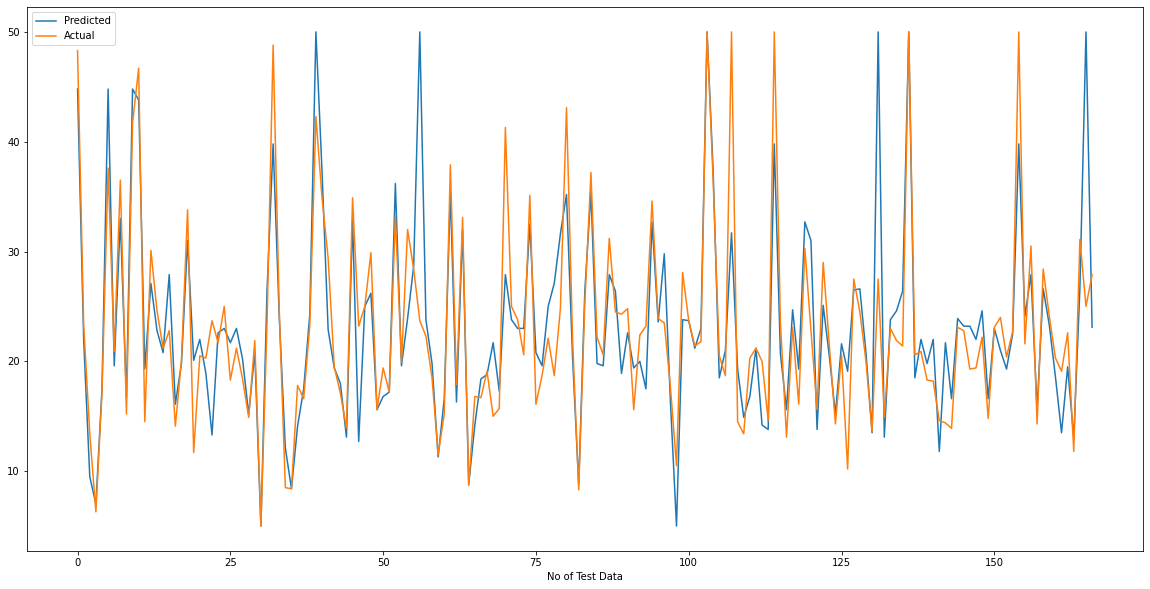

In [ ]:
plt.figure(figsize=(20,10))
plt.plot((y_predicted))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

croos validation and hyper parameter tuneing

In [ ]:
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.model_selection import GridSearchCV
#model = DecisionTreeRegressor()
#criterion=["squared_error","absolute_error",'friedman_mse','poisson']
#max_features=['auto', 'sqrt', 'log2']
#splitter=['best','random']
# define grid search
#grid = DecisionTreeRegressor(criterion=criterion,max_features=max_features,splitter=splitter)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error',error_score=0)
#grid_result = grid_search.fit(X, y)
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
 #   print("%f (%f) with: %r" % (mean, stdev, param))

In [66]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()
parameters = {"criterion":["squared_error","absolute_error",'friedman_mse','poisson'],"max_features":['auto', 'sqrt', 'log2'],"splitter":['best','random']}
tree = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=4)
tree.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [67]:
print("The best fit alpha value is found out to be :" ,tree.best_params_)
print("\nUsing ",tree.best_params_, " the negative mean squared error is: ", tree.best_score_)

The best fit alpha value is found out to be : {'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'best'}

Using  {'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'best'}  the negative mean squared error is:  -20.992743697478993


In [68]:
y_predicted = tree.predict(X_test)

In [69]:
MSE  = mean_squared_error((y_test), (y_predicted))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_predicted))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test), (y_predicted))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predicted)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 19.78365269461078
MAE : 3.038922155688623
RMSE : 4.447881821115617
R2 : 0.7675311607877714
Adjusted R2 :  0.7477789064756213
